 **Exercise1: logistic population growth**

In [100]:
import numpy as np
import matplotlib.pyplot as plt
n=50
x=np.zeros(n+1)
x[0]=0.1
def log (r):
    #this function compute and plot population growth where the only input is r 
    for i in range(n):
        x[i+1]=x[i]*r*(1-x[i])
    plt.plot(range(n+1), x, 'b')
    plt.xlabel('Year')
    plt.ylabel('Number')
    plt.title('Growth rate: %.2f'%(r))
    plt.axvline(np.argmax(np.diff(x)), color = 'k')
    plt.show()
    

**test the function with different growth rates**

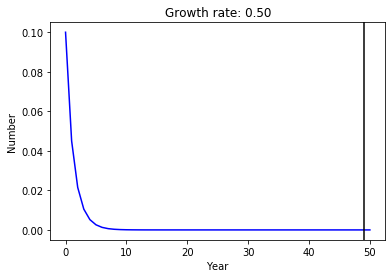

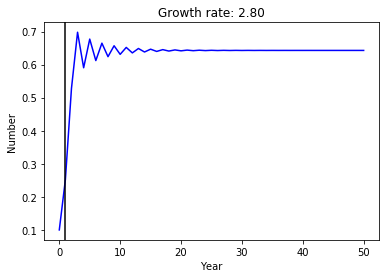

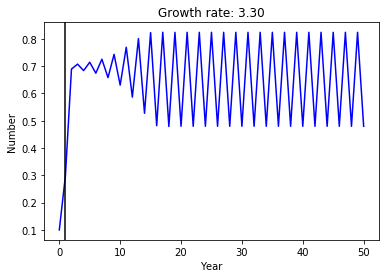

In [101]:
log(0.5)
log(2.8)
log(3.3)

It is observed that for r less than 1, the population decays to zero and for r =2.8 the population grows till it reaches a steady-state equilibrium, when r =3.3 the population grows till it reaches an oscillating state at the end


**Exercise 2: Forward Euler**

In [102]:

def FE (h,T,x0):
    #this function uses forward Euler's method to solve for first ODE
    Nt = int(round(float(T)/h))
    x=np.zeros(Nt+1)
    x[0]=x0
    t = np.linspace(0, T, len(x))
    for i in range(Nt):
        t[i]=i*h
        x[i+1]=x[i]+h*x[i]   
    ax = plt.subplot(111)
    ax.plot(t, x, label='dx/dt=x')
    ax.plot(t, np.exp(t), label='x(t)=exp(t)')
    plt.xlabel('t'); plt.ylabel('x(t)')
    plt.title('step size: %.3f'%(h))
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.show()

**plotting solution overlaid with function x(t)=exp(t)**

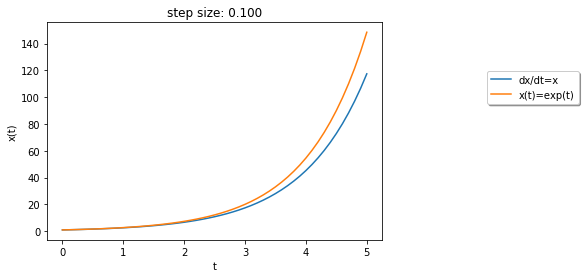

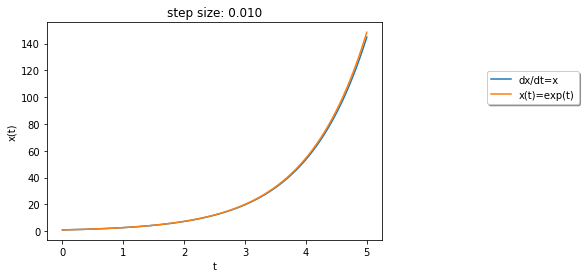

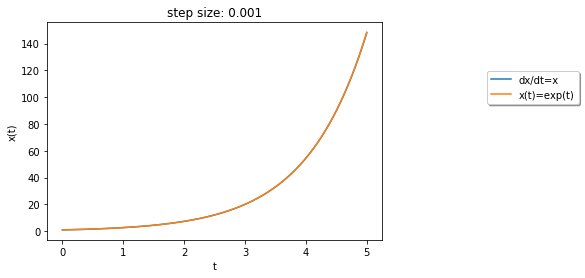

In [103]:
FE(0.1,5,1)
FE(0.01,5,1)
FE(0.001,5,1)


As the step size (h) decreases, the graph becomes more similar to the exponential curve. That is expected because as h approaches zero , we approximate the derivative better. 

**Exercise 3: The FitzHugh-Nagumo Model**

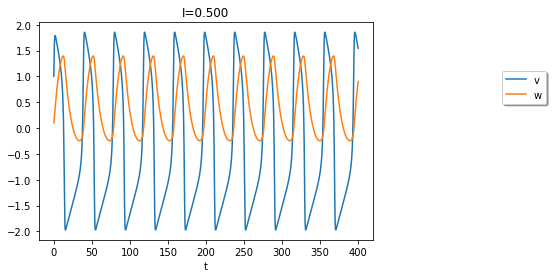

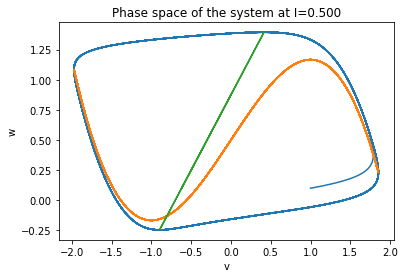

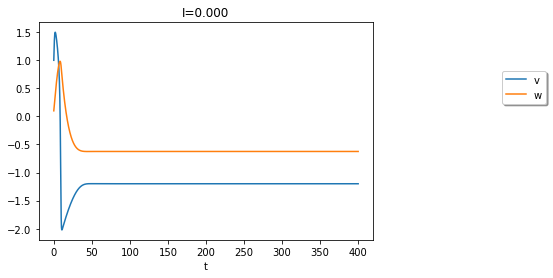

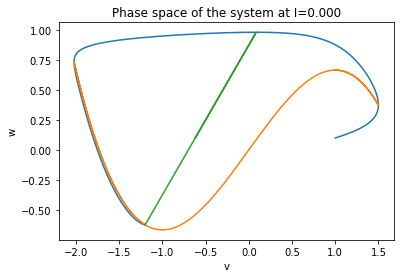

In [104]:
def FE2 (I,epi=0.08,a=0.7,b=0.8,T=400,h=0.01,v0=1,w0=0.1):

    #this function solves for differential equation in 2D forward_Euler method 
    N=int(round(float(T)/h))
    v=np.zeros(N+1)
    v[0]=v0
    w=np.zeros(N+1)
    w[0]=w0
    t = np.linspace(0, T, len(v))
    for i in range(N):
        t[i]=i*h
        v[i+1]=v[i]+h*(v[i]-(v[i]**3)/3-w[i]+I)
        w[i+1]=w[i]+h*(epi*(v[i]+a-b*w[i]))
    
    ax=plt.subplot(111)
    ax.plot(t,v,label='v')
    ax.plot(t,w,label='w')
    plt.xlabel('t')
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.title('I=%.3f'%(I))
    plt.show()
    
    '''Exercise 3.2'''
    #plotting phase plane trajectory and v-nullcline and w-nullcline
    #v_nulcline
    w_n=v-(v**3)/3+I
    #w_nulcline
    v_n=b*w-a
    
    plt.plot(v,w,v,w_n,v_n,w)
    plt.xlabel('v');plt.ylabel('w')
    plt.title('Phase space of the system at I=%.3f'%(I))
    plt.show()
    return v,w

FitzHN=FE2(0.5)

"""Exercise 3.5 at I=0"""
New_Model =FE2(0)
# no oscillation is observed(stable focus)



**Exericse 3.3 and 3.4**

In [105]:
#I=0.5
a=0.7
b=0.8
epi=0.08  
import numpy as np
from numpy import linalg as LA
from scipy.optimize import *
import sympy as sp
def myfunction(z,I):
    v=z[0]
    w=z[1]
    dv=I-pow(v,3)/3+v-w
    dw=epi*a+epi*v-b*epi*w
    return [dv,dw]

def calc_eigens(I):
    """
    Calculate eigenvalues for a given set of parameters
    """
    # Symbolic equations
    (v, w) = sp.symbols('v, w', real=True)
    dv, dw = myfunction((v,w),I)
    # Jacobian
    J = sp.Matrix([dv, dw]).jacobian([v,w])
    # Fixed points/steady state concentrations
    init_condi=([1,0.1])
    v_star , w_star = fsolve(myfunction,init_condi,args=(I))
    fixed_points = [v_star, w_star]
    J_atFP = J.subs([(v, v_star), (w, w_star)])
    J_atFP = np.array(J_atFP).astype(np.float64)
    eigens = np.linalg.eigvals(J_atFP)
    # Calculate eigenvalues of Jacobian at fixed points
     
    print('eigen values are {} and fixed points are {} when I is {}'.format(eigens,fixed_points,I))
    return eigens, fixed_points

calc_eigens(0.5)
#calc_eigens(0)

eigen values are [0.14411005+0.19154688j 0.14411005-0.19154688j] and fixed points are [-0.804847747008333, -0.13105968376041646] when I is 0.5


(array([0.14411005+0.19154688j, 0.14411005-0.19154688j]),
 [-0.804847747008333, -0.13105968376041646])

yes it is expected because there is no overlab with the trajectory so there is no equilibrium state 

**Exercise 3.5 continued**
when I=0, eigen values are [-0.25128982+0.21194934j -0.25128982-0.21194934j] and fixed points are [-1.1994080352440348, -0.6242600440550438]

[0.  0.1 0.2 0.3 0.4 0.5]
eigen values are [-0.25128982+0.21194934j -0.25128982-0.21194934j] and fixed points are [-1.1994080352440348, -0.6242600440550438] when I is 0.0
eigen values are [-0.17896704+0.25842326j -0.17896704-0.25842326j] and fixed points are [-1.1375122287465527, -0.546890285933191] when I is 0.1
eigen values are [-0.10379965+0.28002855j -0.10379965-0.28002855j] and fixed points are [-1.0693920265985872, -0.4617400332482341] when I is 0.2
eigen values are [-0.02531994+0.28018539j -0.02531994-0.28018539j] and fixed points are [-0.9932974745495967, -0.3666218431869959] when I is 0.30000000000000004
eigen values are [0.05706808+0.25562183j 0.05706808-0.25562183j] and fixed points are [-0.9065670677867891, -0.2582088347334864] when I is 0.4
eigen values are [0.14411005+0.19154688j 0.14411005-0.19154688j] and fixed points are [-0.804847747008333, -0.13105968376041646] when I is 0.5


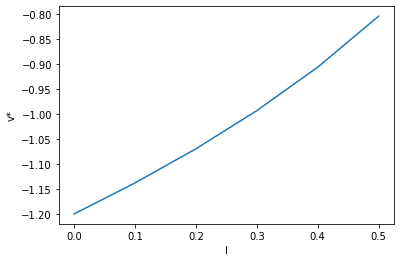

In [108]:
"""Exercise 3.6"""
from collections import defaultdict
IV=np.arange(0.0,0.6,0.1)
print(IV)
fixed_pnt=[]
for i in IV:
    I=i
    eigenval, fixed_point = calc_eigens(I)
    fixed_pnt.append(fixed_point)

v_fixed=[item[0] for item in fixed_pnt]
plt.plot(IV,v_fixed)
plt.xlabel("I");plt.ylabel('v*')
plt.show()
